In [51]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sb

In [52]:
#Load Data
df = pd.read_csv("http://bit.ly/w-data",header=0)

In [53]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [55]:
#Descriptive Statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


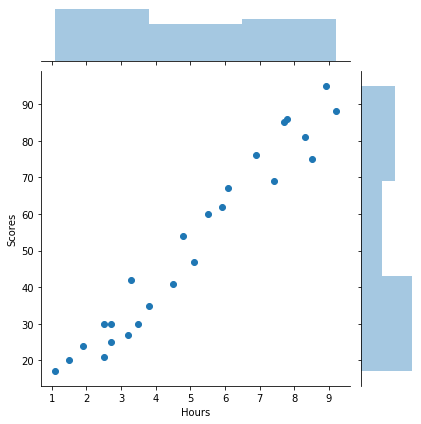

In [56]:
#Scatter Plot
sb.jointplot(x='Hours',y='Scores',data=df)

In [57]:
#Correlation Matrix
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above correlation matrix we can see that there is a strong postive correlation between Hours and Scores.

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
from sklearn.model_selection import train_test_split

In [64]:
Hours = pd.DataFrame(df['Hours'])
Scores = pd.DataFrame(df['Scores'])

In [65]:
#Train-Test Split
X_train,X_test,Y_train,Y_test=train_test_split(Hours,Scores,test_size=0.2,random_state=0)

In [66]:
#Fitting the linear regression model
lm = LinearRegression()
model = lm.fit(X_train,Y_train)

In [67]:
model.coef_

array([[9.91065648]])

In [68]:
model.intercept_

array([2.01816004])

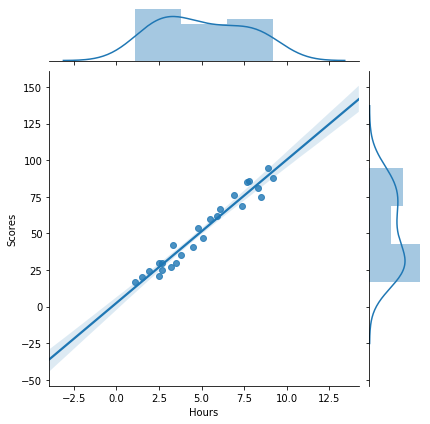

In [76]:
#Plotting the regression line
sb.jointplot(x=df['Hours'],y=df['Scores'],data=df,kind='reg')

In [71]:
#comparing the actual values and predicted values
Y_test_pred=model.predict(X_test)

In [72]:
Y_test

,Scores
5,20
2,27
19,69
16,30
11,62


In [73]:
Y_test_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [69]:
hours_new=[[9.25]]

In [70]:
#Prediction
Score_predict=model.predict(hours_new)
print("If study hour is 9.25, then percentage of mark is",Score_predict)

array([[93.69173249]])

In [74]:
#Accuracy of the model
from sklearn.metrics import r2_score
r2_value=r2_score(Y_test,Y_test_pred)

In [77]:
print("The Accuracy of the model is",r2_value*100)

The Accuracy of the model is 94.54906892105356
